<a href="https://colab.research.google.com/github/likeshd/case_studies_and_projects/blob/main/CUSTOMER_CHURN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/customer_churn (4).csv")

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# EDA: Exploratory data analysis

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

 **A) Data Manipulation:**

**a. Extract the 5th column & store it in ‘customer_5’**

In [ ]:
customer_5 = df.iloc[:,4]     #works on index value

In [ ]:
print(customer_5)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object


In [ ]:
customer_5 = df.loc[:,["Dependents"]]     #works on the columns name

In [ ]:
print(customer_5)

     Dependents
0            No
1            No
2            No
3            No
4            No
...         ...
7038        Yes
7039        Yes
7040        Yes
7041         No
7042         No

[7043 rows x 1 columns]


**b. Extract the 15th column & store it in ‘customer_15’**

In [ ]:
customer_15 = df.iloc[:,14]

In [ ]:
print(customer_15)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object


In [ ]:
customer_15 = df.loc[:,["StreamingMovies"]]

In [ ]:
print(customer_15)

     StreamingMovies
0                 No
1                 No
2                 No
3                 No
4                 No
...              ...
7038             Yes
7039             Yes
7040              No
7041              No
7042             Yes

[7043 rows x 1 columns]


**c. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’**

In [ ]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df.PaymentMethod.nunique()

4

In [ ]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
senior_male_electronic = df[(df["gender"]=="Male") & (df["SeniorCitizen"]==1) & (df["PaymentMethod"]=="Electronic check")]

In [ ]:
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


**d. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’**

In [ ]:
customer_total_tenure = df[(df["tenure"]>70) | (df["MonthlyCharges"]>100)]

In [ ]:
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


**e. Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’**

In [ ]:
two_mail_yes = df[(df["Contract"]=="Two year") & (df["PaymentMethod"]=="Mailed check") & (df["Churn"]=="Yes")]

In [ ]:
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


**f. Extract 333 random records from the customer_churn dataframe& store the result in ‘customer_333’**

In [ ]:
customer_333 = df.sample(n = 333)

In [ ]:
customer_333   #3479

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4108,2650-GYRYL,Male,0,Yes,Yes,33,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.45,600.25,No
3573,6506-EYCNH,Female,0,Yes,Yes,28,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.55,543.8,No
2937,5312-IRCFR,Female,0,Yes,Yes,64,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Electronic check,92.85,5980.75,No
2523,9081-WWXKP,Female,0,Yes,Yes,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,873.4,No
696,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),85.15,6316.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,0266-GMEAO,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.30,8058.55,No
5309,0704-VCUMB,Female,0,Yes,No,61,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.8,No
5489,0804-XBFBV,Female,0,No,Yes,11,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25.20,321.05,No
1056,6941-PMGEP,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.00,412.5,Yes


**g. Get the count of different levels from the ‘Churn’ column**

In [ ]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**B) Data Visualization:**

a. Build a bar-plot for the ’InternetService’ column:

i. Set x-axis label to ‘Categories of Internet Service’.

ii. Set y-axis label to ‘Count of Categories’.

iii. Set the title of plot to be ‘Distribution of Internet Service’.

iv. Set the color of the bars to be ‘orange’.

In [ ]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
x = df["InternetService"].value_counts().keys().to_list()

In [ ]:
x

['Fiber optic', 'DSL', 'No']

In [ ]:
y = df["InternetService"].value_counts().to_list()

In [ ]:
y

[3096, 2421, 1526]

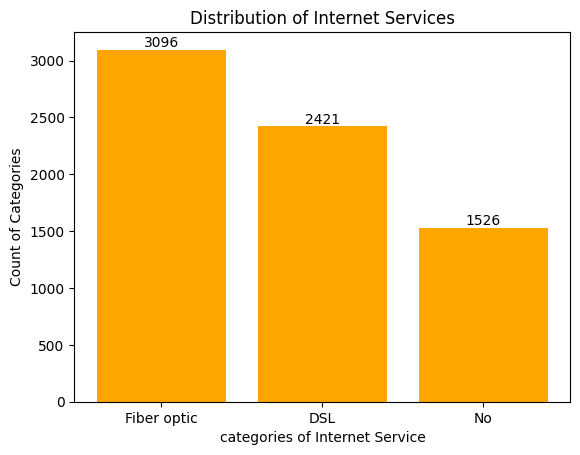

In [ ]:
plt.bar(x,y,color="orange")
plt.xlabel("categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Services")
for i, v in enumerate(y):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

b. Build a histogram for the ‘tenure’ column:

i. Set the number of bins to be 30

ii. Set the color of the bins to be ‘green’

iii. Assign the title ‘Distribution of tenure’

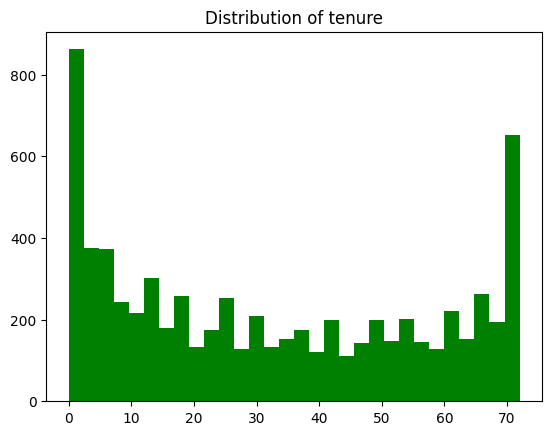

In [ ]:
plt.hist(df["tenure"],bins=30,color="green")
plt.title("Distribution of tenure")
plt.show()

c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:

i. Assign the points a color of ‘brown’

ii. Set the x-axis label to ‘Tenure of customer’

iii. Set the y-axis label to ‘Monthly Charges of customer’

iv. Set the title to ‘Tenure vs Monthly Charges’

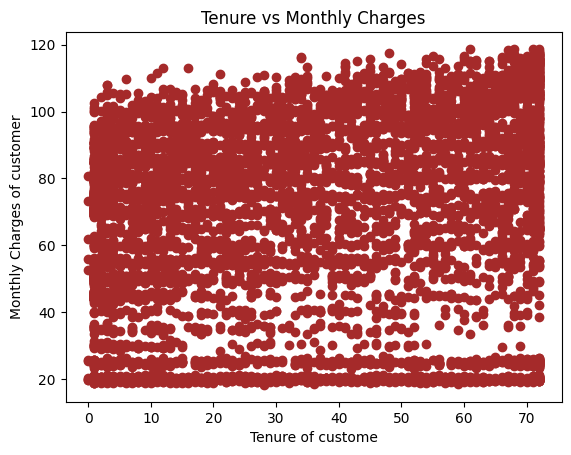

In [ ]:
plt.scatter(x = df["tenure"], y = df["MonthlyCharges"],color="brown")
plt.xlabel("Tenure of custome")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

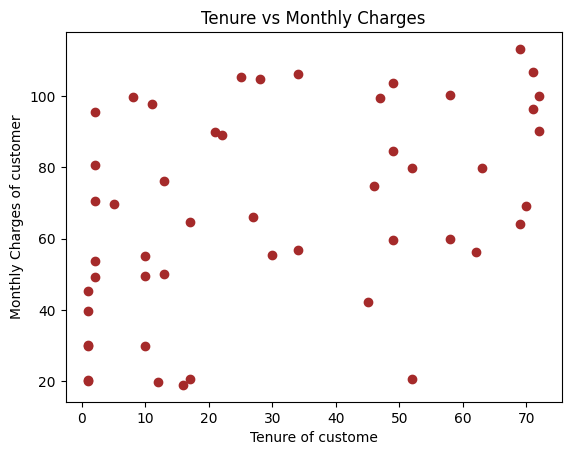

In [ ]:
plt.scatter(x = df["tenure"].head(50), y = df["MonthlyCharges"].head(50),color="brown")
plt.xlabel("Tenure of custome")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

<Axes: xlabel='Contract', ylabel='tenure'>

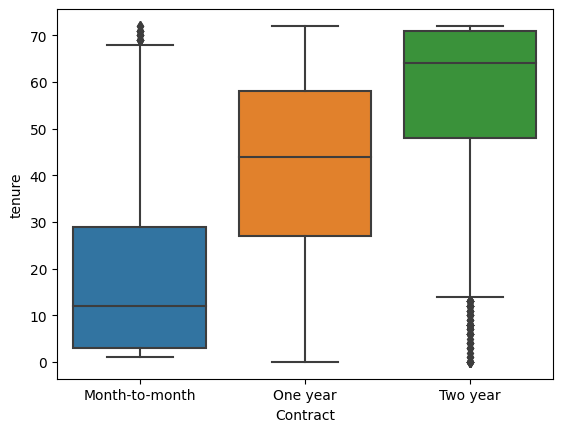

In [ ]:
sns.boxplot(x = df["Contract"], y=df["tenure"])

**C) Linear Regression:**

a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’

i. Divide the dataset into train and test sets in 70:30 ratio.

ii. Build the model on train set and predict the values on test set

iii. After predicting the values, find the root mean square error

iv. Find out the error in prediction & store the result in ‘error’

v. Find the root mean square error

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
x = df.loc[:,["tenure"]].values

In [ ]:
x

array([[ 1],
       [34],
       [ 2],
       ...,
       [11],
       [ 4],
       [66]])

In [ ]:
y = df.loc[:,["MonthlyCharges"]].values

In [ ]:
y

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [ ]:
x_train

array([[ 9],
       [14],
       [64],
       ...,
       [58],
       [ 1],
       [ 4]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
l_reg = LinearRegression()

In [ ]:
l_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = l_reg.predict(x_test)

In [ ]:
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
mse

864.0415701364655

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

29.394584027273893

In [ ]:
r2 = r2_score(y_test,y_pred)

In [ ]:
r2

0.069470028128085

D) Logistic Regression:

a. Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’

i. Divide the dataset in 65:35 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [ ]:
x = df.loc[:,["MonthlyCharges"]].values

In [ ]:
x

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [ ]:
y = df.loc[:,["Churn"]]

In [ ]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lo_reg = LogisticRegression()

In [ ]:
lo_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = lo_reg.predict(x_test)

In [ ]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1815,    0],
       [ 651,    0]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7360097323600974

In [ ]:
c_rep = classification_report(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(c_rep)

              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1815
         Yes       0.00      0.00      0.00       651

    accuracy                           0.74      2466
   macro avg       0.37      0.50      0.42      2466
weighted avg       0.54      0.74      0.62      2466



In [ ]:
# precision = tp/tp+fp
#recall = tp/tp+fn


b. Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [ ]:
x = df.loc[:,["MonthlyCharges","tenure"]]
y = df.loc[:,["Churn"]]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.7735982966643009

In [ ]:
confusion_matrix(y_test,y_pred)

array([[934, 107],
       [212, 156]])

In [ ]:
r = classification_report(y_test,y_pred)

In [ ]:
print(r)

              precision    recall  f1-score   support

          No       0.82      0.90      0.85      1041
         Yes       0.59      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



E) Decision Tree:


a. Build a decision tree model where dependent variable is ‘Churn’ & independent
variable is ‘tenure’

i. Divide the dataset in 80:20 ratio


ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

In [ ]:
x = df.loc[:,["tenure"]]
y = df.loc[:,["Churn"]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
d_tree = DecisionTreeClassifier()

In [ ]:
d_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = d_tree.predict(x_test)

In [ ]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.7466288147622427

In [ ]:
confusion_matrix(y_test,y_pred)

array([[965,  76],
       [281,  87]])

F) Random Forest:

a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
variables are ‘tenure’ and ‘MonthlyCharges’

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy